### VISUALIZA EL COMPORTAMIENTO DE LOS ARCHIVOS CSV SELECCIONADOS

Grafica el comportamiento de una columna o mas con respecto a su columna de tiempo.

-ejecutar el codigo

-en la parte inferior del codigo, se muestran las columnas disponibles a graficar

-se abrira un apartado para que pueda escribir la o las columnas que desee graficar, tendra que separar con comas cada columna diferente

-presione enter para graficar

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ruta del archivo CSV
ruta_archivo = 'C:/Users/cesar chavez/Desktop/proyecto/CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_concatenado.csv'  # Cambia esto por tu ruta

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Mostrar las columnas disponibles para que el usuario elija
print("Columnas disponibles para graficar:", df.columns)

# Pedir al usuario que elija múltiples columnas para graficar
columnas_a_graficar = input("Ingresa los nombres de las columnas que deseas graficar (separadas por comas): ")
columnas_a_graficar = [col.strip() for col in columnas_a_graficar.split(',')]

# Verificar si las columnas existen en el DataFrame
columnas_invalidas = [col for col in columnas_a_graficar if col not in df.columns]
if columnas_invalidas:
    print(f"Las siguientes columnas no existen en el DataFrame: {', '.join(columnas_invalidas)}")
else:
    # Crear la gráfica
    plt.figure(figsize=(10, 5))
    for columna in columnas_a_graficar:
        plt.plot(df['fecha'], df[columna], linestyle='-', label=columna)  # Línea continua para cada columna

    # Formato de fecha en el eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Cambiar intervalo según necesidad

    # Añadir títulos y etiquetas
    plt.title('Comparación de Columnas a lo Largo del Tiempo')
    plt.xlabel('Hora')
    plt.ylabel('Valor')
    plt.xticks(rotation=45)
    plt.legend()  # Añadir leyenda para identificar cada columna

    # Mostrar solo los números de la fecha en el pie de la gráfica
    fecha_unica = df['fecha'].dt.date.unique()
    plt.figtext(0.5, 0.01, ' '.join([str(f) for f in fecha_unica]), ha='center', va='center', fontsize=10)

    # Añadir una cuadrícula
    plt.grid()

    # Ajustar y mostrar la gráfica
    plt.tight_layout()
    plt.show()


Columnas disponibles para graficar: Index(['fecha', 'valor'], dtype='object')
Las siguientes columnas no existen en el DataFrame: 


Grafica el comportamiento de una columna o mas, en un determinado lapso de tiempo seleccionado y permite guardarlo si asi lo desea

-modificar en el codigo el lapso de tiempo que desee graficar

-continuar el proceso igual al codigo anterior

-si requiere guardar el archivo graficado como un csv escriba la ruta en la siguiente linea de codigo:

 #Guardar el DataFrame filtrado en un nuevo archivo CSV
    nuevo_archivo_csv = 'ruta donde se guardara el archivo csv'

nota: quitar los ultimos tres # si es que desea guardar el archivo

Columnas disponibles para graficar: Index(['fecha', 'valor'], dtype='object')


C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_2864\2702688063.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo'] = (df_filtrado['fecha'] - df_filtrado['fecha'].min()).dt.total_seconds()
C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_2864\2702688063.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo'] = pd.to_timedelta(df_filtrado['Tiempo'], unit='s').astype(str).str.split(' ').str[-1]


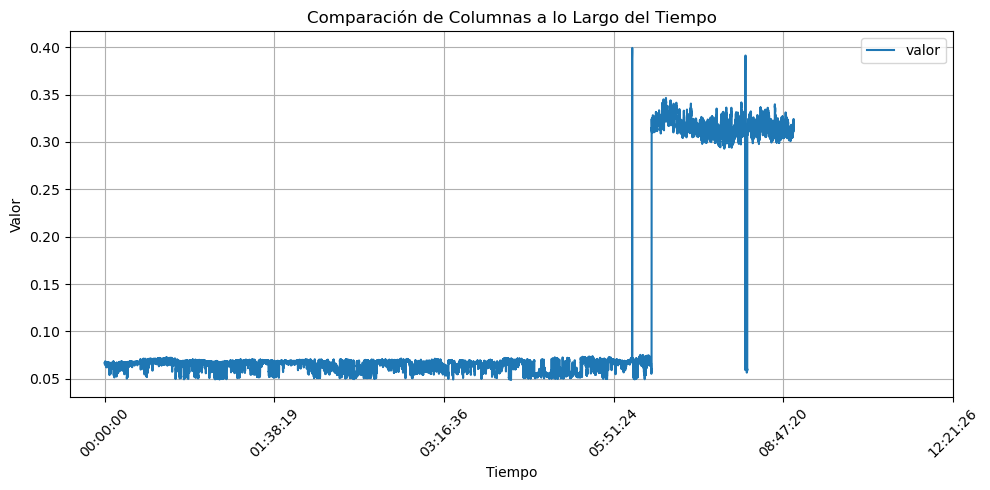

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
ruta_archivo = 'C:/Users/cesar chavez/Desktop/proyecto/CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_concatenado.csv'  # Cambia esto por tu ruta

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Mostrar las columnas disponibles para que el usuario elija
print("Columnas disponibles para graficar:", df.columns)

# Pedir al usuario que elija múltiples columnas para graficar
columnas_a_graficar = input("Ingresa los nombres de las columnas que deseas graficar (separadas por comas): ")
columnas_a_graficar = [col.strip() for col in columnas_a_graficar.split(',')]

# Verificar si las columnas existen en el DataFrame
columnas_invalidas = [col for col in columnas_a_graficar if col not in df.columns]
if columnas_invalidas:
    print(f"Las siguientes columnas no existen en el DataFrame: {', '.join(columnas_invalidas)}")
else:
    # Definir el rango de fechas (ajusta según tus necesidades)
    fecha_inicio = '2024-09-04 01:00:00'  # Cambia esta fecha
    fecha_fin = '2024-09-04 14:00:00'      # Cambia esta fecha

    # Filtrar los datos según el rango de fechas
    df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]

    # Crear una nueva columna de 'Tiempo' como tiempo transcurrido desde el inicio
    df_filtrado['Tiempo'] = (df_filtrado['fecha'] - df_filtrado['fecha'].min()).dt.total_seconds()
    df_filtrado['Tiempo'] = pd.to_timedelta(df_filtrado['Tiempo'], unit='s').astype(str).str.split(' ').str[-1]

    # Crear la gráfica
    plt.figure(figsize=(10, 5))
    for columna in columnas_a_graficar:
        plt.plot(df_filtrado['Tiempo'], df_filtrado[columna], linestyle='-', label=columna)  # Línea continua para cada columna

    # Añadir títulos y etiquetas
    plt.title('Comparación de Columnas a lo Largo del Tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend()  # Añadir leyenda para identificar cada columna

    # Configurar ticks en el eje X
    num_ticks = 5  # Número de ticks a mostrar
    plt.xticks(range(0, len(df_filtrado), max(1, len(df_filtrado) // num_ticks)), 
               df_filtrado['Tiempo'][::max(1, len(df_filtrado) // num_ticks)], rotation=45)

    # Añadir una cuadrícula
    plt.grid()

    # Ajustar y mostrar la gráfica
    plt.tight_layout()
    plt.show()

    # Guardar el DataFrame filtrado en un nuevo archivo CSV
    #nuevo_archivo_csv = ''
    #df_filtrado[['Tiempo'] + columnas_a_graficar].to_csv(nuevo_archivo_csv, index=False)

    #print(f"Datos filtrados guardados como '{nuevo_archivo_csv}'.")


### Grafico de calor

quitar los ultimos dos # si es que desea guardar el archivo

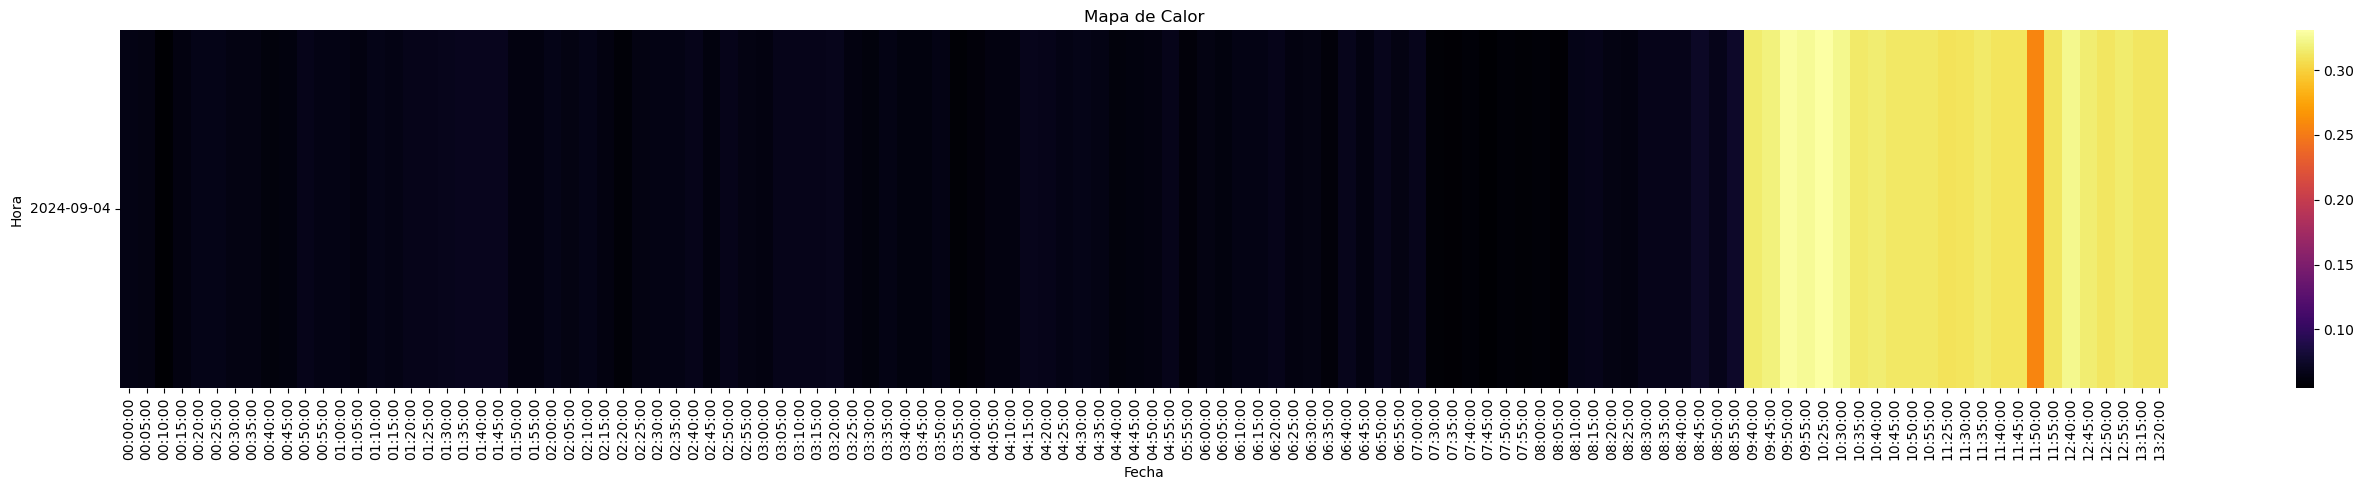

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#CSV a DataFrame
df = pd.read_csv("C:/Users/cesar chavez/Desktop/SegregacionEnergia/archivo_concatenado.csv")

# Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

#columna fecha como índice
df.set_index('fecha', inplace=True)

# cada cuanto tiempo necesitas la medicion
df_resampled = df.resample('5min').mean().reset_index()

#fecha y la hora
df_resampled['date'] = df_resampled['fecha'].dt.date
df_resampled['time'] = df_resampled['fecha'].dt.time

# Crear la tabla pivote
pivot_df = df_resampled.pivot_table(index='date', columns='time', values='valor', aggfunc='mean', fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(27, 5))
heatmap = sns.heatmap(pivot_df, cmap="inferno", cbar=True)

# Ajustar la visualización
plt.title('Mapa de Calor')
plt.xlabel('Fecha')
plt.ylabel('Hora')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario
plt.yticks(rotation=0)   # Rotar las etiquetas del eje y si es necesario
plt.tight_layout()       # Ajustar el diseño para que no se corten las etiquetas

# Guardar la imagen
#plt.savefig('mapa_de_calor.png', dpi=300)  # Guarda la imagen con alta resolución
#plt.show()


graficar archivos csv


Tipo: Corriente_linea1.csv | Rango de fechas disponibles: 2024-08-19 18:21:52 a 2024-08-22 00:21:02


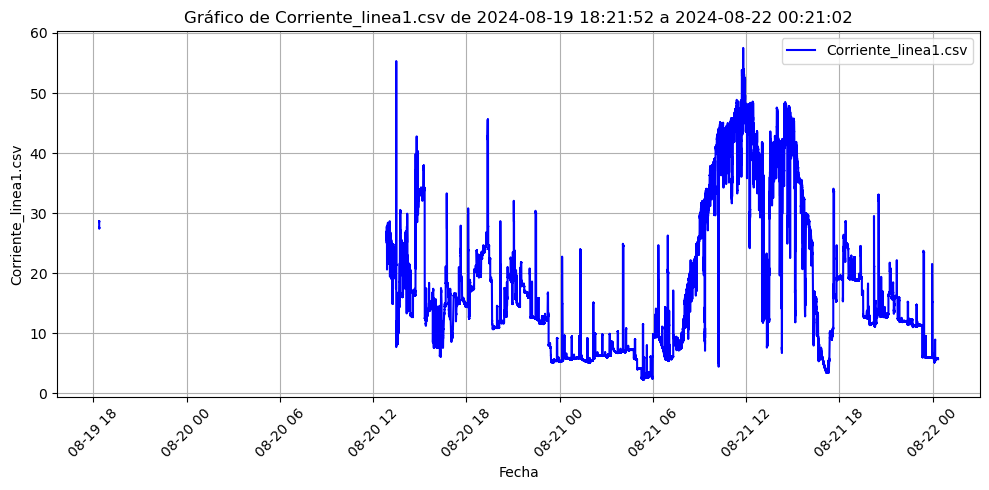

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# Ruta de la carpeta principal que contiene los archivos CSV
carpeta_principal = 'C:/Users/cesar chavez/Desktop/Nueva carpeta (3)'  # Cambia esto por tu ruta

# Leer todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(carpeta_principal, '*.csv'))

# Diccionario para almacenar los DataFrames organizados por tipo
datos = {}

# Leer y organizar los datos
for archivo in archivos_csv:
    nombre_archivo = os.path.basename(archivo)  # Obtener el nombre del archivo
    fecha_str, tipo = nombre_archivo.split(' ', 1)  # Separar fecha y tipo
    tipo = tipo.strip()  # Quitar espacios en blanco

    df = pd.read_csv(archivo)

    # Convertir la columna 'fecha' a tipo datetime
    df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

    # Agregar una columna de fecha extraída
    df['fecha_archivo'] = pd.to_datetime(fecha_str)

    # Almacenar en el diccionario
    if tipo not in datos:
        datos[tipo] = df
    else:
        datos[tipo] = pd.concat([datos[tipo], df])

# Solicitar al usuario el tipo de dato a graficar
tipo_dato = input("Ingresa el tipo de dato a graficar (ejemplo: Corriente_linea1, Voltaje_linea1): ")

# Filtrar las claves que contengan el tipo de dato ingresado
tipos_disponibles = {k: v for k, v in datos.items() if tipo_dato in k}

# Verificar si hay datos para el tipo seleccionado
if tipos_disponibles:
    for key, df_dato in tipos_disponibles.items():
        # Mostrar rango de fechas disponible
        fecha_inicio = df_dato['fecha'].min()
        fecha_fin = df_dato['fecha'].max()
        print(f"\nTipo: {key} | Rango de fechas disponibles: {fecha_inicio} a {fecha_fin}")

        # Pedir al usuario el rango de fechas para graficar
        rango_inicio = input("Ingresa la fecha de inicio (YYYY-MM-DD HH:MM:SS): ")
        rango_fin = input("Ingresa la fecha de fin (YYYY-MM-DD HH:MM:SS): ")

        # Filtrar los datos según el rango de fechas
        df_filtrado = df_dato[(df_dato['fecha'] >= rango_inicio) & (df_dato['fecha'] <= rango_fin)]

        # Verificar si hay datos filtrados
        if not df_filtrado.empty:
            # Detectar valores faltantes
            df_filtrado = df_filtrado.sort_values('fecha')
            dif = df_filtrado['fecha'].diff() > pd.Timedelta(minutes=1)
            df_filtrado['group'] = dif.cumsum()

            # Crear la gráfica
            plt.figure(figsize=(10, 5))

            # Dibujar solo los tramos donde hay datos
            for group, data in df_filtrado.groupby('group'):
                plt.plot(data['fecha'], data['valor'], linestyle='-', label=key if group == 0 else "", color='blue')

            plt.title(f'Gráfico de {key} de {rango_inicio} a {rango_fin}')
            plt.xlabel('Fecha')
            plt.ylabel(key)
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()
            plt.legend()
            plt.show()
        else:
            print(f"No hay datos en el rango de fechas seleccionado para {key}.")
else:
    print(f"No se encontraron datos para el tipo '{tipo_dato}'.")


graficar archivos xlsx

insertar la hora en este formato 2024-08-18 00 (hora)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import os

# Paso 1: Solicitar el nombre base de los archivos al usuario
nombre_base = input("Por favor, ingresa el nombre base de los archivos (ejemplo: 'Corriente'): ")

# Paso 2: Crear la ruta de búsqueda de archivos
ruta_archivos = f'C:/Users/cesar chavez/Desktop/Nueva carpeta (3)/*{nombre_base}*.xlsx'

# Paso 3: Cargar los archivos de Excel que coinciden con el nombre base
archivos = glob.glob(ruta_archivos)

if not archivos:
    print("No se encontraron archivos con el nombre base proporcionado.")
    exit()

# Obtener el primer y último archivo
primer_archivo = archivos[0]
ultimo_archivo = archivos[-1]

# Inicializar variables para las fechas
fecha_inicio_posible = None
fecha_fin_posible = None

# Leer el primer archivo para obtener la fecha de inicio
try:
    df_primer_archivo = pd.read_excel(primer_archivo)
    fecha_inicio_posible = pd.to_datetime(df_primer_archivo.iloc[1, 0])  # Segunda fila, primera columna
except Exception as e:
    print(f"Error al leer el primer archivo {primer_archivo}: {e}")

# Leer el último archivo para obtener la fecha de fin
try:
    df_ultimo_archivo = pd.read_excel(ultimo_archivo)
    fecha_fin_posible = pd.to_datetime(df_ultimo_archivo.iloc[-1, 0])  # Última fila, primera columna
except Exception as e:
    print(f"{ultimo_archivo}: {e}")

# Verificar si se leyeron correctamente las fechas
if fecha_inicio_posible and fecha_fin_posible:
    print(f"Rango de fechas posible para graficar: {fecha_inicio_posible} a {fecha_fin_posible}")
else:
    print("No se pudieron determinar las fechas posibles para graficar.")
    exit()

# Paso 4: Solicitar el rango de fechas al usuario
fecha_inicio_str = input("Ingresa la fecha y hora de inicio (formato YYYY-MM-DD HH): ")
fecha_fin_str = input("Ingresa la fecha y hora de fin (formato YYYY-MM-DD HH): ")

# Convertir las fechas de inicio y fin a tipo datetime, añadiendo minutos y segundos como 00
fecha_inicio = pd.to_datetime(fecha_inicio_str + ":00")
fecha_fin = pd.to_datetime(fecha_fin_str + ":00")

print(f"Fecha de inicio: {fecha_inicio}")
print(f"Fecha de fin: {fecha_fin}")

dataframes = []

for archivo in archivos:
    try:
        # Extraer la fecha del nombre del archivo
        nombre_archivo = os.path.basename(archivo)
        fecha_archivo_str = nombre_archivo.split(' ')[0]
        fecha_archivo = pd.to_datetime(fecha_archivo_str)

        print(f"Procesando archivo: {nombre_archivo}, Fecha del archivo: {fecha_archivo}")

        if fecha_archivo < fecha_inicio or fecha_archivo > fecha_fin:
            print(f"Fecha del archivo {fecha_archivo} está fuera del rango. Continuando...")
            continue
        
        df = pd.read_excel(archivo)
        df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S', errors='coerce')
        df = df.dropna(subset=['fecha', 'valor'])
        df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]
        
        print(f"Se encontraron {len(df_filtrado)} datos válidos en el archivo {nombre_archivo}.")
        
        if not df_filtrado.empty:
            dataframes.append(df_filtrado)
    
    except Exception as e:
        print(f"Error al procesar el archivo {archivo}: {e}")

if dataframes:
    df_concatenado = pd.concat(dataframes, ignore_index=True)

    plt.figure(figsize=(10, 6))
    plt.plot(df_concatenado['fecha'], df_concatenado['valor'])

    plt.xlim(fecha_inicio, fecha_fin)

    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title(f'Gráfico de Valores desde {fecha_inicio_str} hasta {fecha_fin_str} para "{nombre_base}"')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()
else:
    print("No se encontraron datos válidos en el rango de fechas seleccionado.")


Error al leer el primer archivo C:/Users/cesar chavez/Desktop/Nueva carpeta (3)\2024-08-19 Corriente_linea1.xlsx: Unknown datetime string format, unable to parse: 2024-08-19_18-21-53, at position 0
C:/Users/cesar chavez/Desktop/Nueva carpeta (3)\2024-09-23 Corriente_linea1.xlsx: Unknown datetime string format, unable to parse: 2024-09-23_11-25-11, at position 0
No se pudieron determinar las fechas posibles para graficar.


DateParseError: Unknown datetime string format, unable to parse: 2024-08-19 18:21:53:00:00:00, at position 0

: 

Fecha de inicio: 2024-08-19 00:00:00
Fecha de fin: 2024-08-21 00:00:00
Procesando archivo: 2024-08-19 Corriente_linea1.xlsx, Fecha del archivo: 2024-08-19 00:00:00
Se encontraron 24 datos válidos en el archivo 2024-08-19 Corriente_linea1.xlsx.
Procesando archivo: 2024-08-20 Corriente_linea1.xlsx, Fecha del archivo: 2024-08-20 00:00:00
Se encontraron 34371 datos válidos en el archivo 2024-08-20 Corriente_linea1.xlsx.
Procesando archivo: 2024-08-21 Corriente_linea1.xlsx, Fecha del archivo: 2024-08-21 00:00:00
Se encontraron 0 datos válidos en el archivo 2024-08-21 Corriente_linea1.xlsx.
Procesando archivo: 2024-08-22 Corriente_linea1.xlsx, Fecha del archivo: 2024-08-22 00:00:00
Fecha del archivo 2024-08-22 00:00:00 está fuera del rango. Continuando...
Procesando archivo: 2024-08-23 Corriente_linea1.xlsx, Fecha del archivo: 2024-08-23 00:00:00
Fecha del archivo 2024-08-23 00:00:00 está fuera del rango. Continuando...
Procesando archivo: 2024-08-24 Corriente_linea1.xlsx, Fecha del archivo:

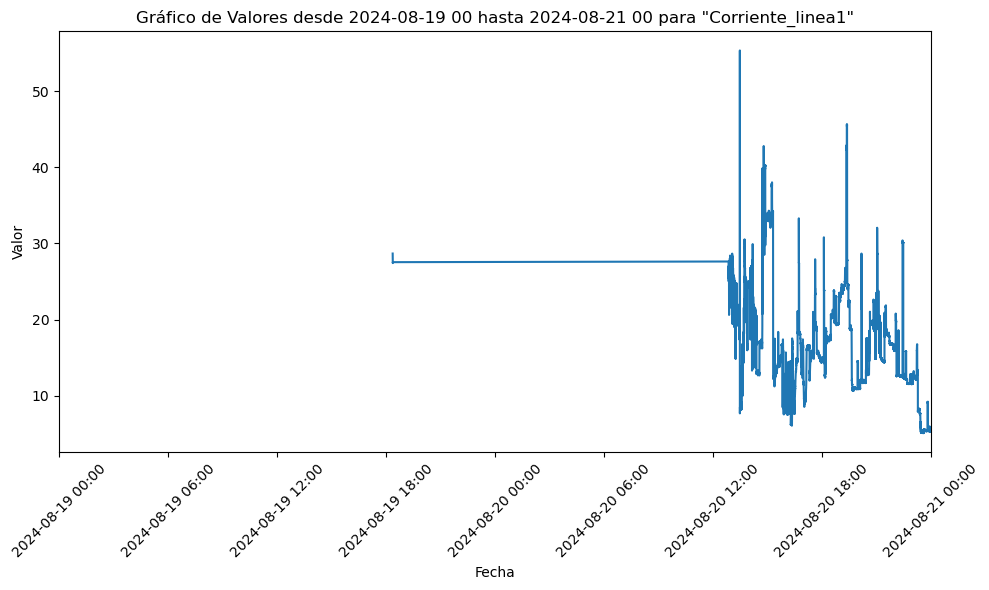

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
import os

# Paso 1: Solicitar el nombre base de los archivos y las fechas al usuario
nombre_base = input("Por favor, ingresa el nombre base de los archivos (ejemplo: 'Corriente'): ")
fecha_inicio_str = input("Ingresa la fecha y hora de inicio (formato YYYY-MM-DD HH): ")
fecha_fin_str = input("Ingresa la fecha y hora de fin (formato YYYY-MM-DD HH): ")

# Convertir las fechas de inicio y fin a tipo datetime, añadiendo minutos y segundos como 00
fecha_inicio = pd.to_datetime(fecha_inicio_str + ":00")
fecha_fin = pd.to_datetime(fecha_fin_str + ":00")

print(f"Fecha de inicio: {fecha_inicio}")
print(f"Fecha de fin: {fecha_fin}")

# Paso 3: Crear la ruta de búsqueda de archivos
ruta_archivos = f'C:/Users/cesar chavez/Desktop/Nueva carpeta (3)/*{nombre_base}*.xlsx'

# Paso 4: Cargar los archivos de Excel que coinciden con el nombre base
archivos = glob.glob(ruta_archivos)
dataframes = []

for archivo in archivos:
    try:
        # Extraer la fecha del nombre del archivo
        nombre_archivo = os.path.basename(archivo)  # Obtener solo el nombre del archivo
        fecha_archivo_str = nombre_archivo.split(' ')[0]  # Extraer la fecha
        fecha_archivo = pd.to_datetime(fecha_archivo_str)

        # Imprimir la fecha del archivo para depuración
        print(f"Procesando archivo: {nombre_archivo}, Fecha del archivo: {fecha_archivo}")

        # Si la fecha del archivo está fuera del rango, continuar
        if fecha_archivo < fecha_inicio or fecha_archivo > fecha_fin:
            print(f"Fecha del archivo {fecha_archivo} está fuera del rango. Continuando...")
            continue
        
        df = pd.read_excel(archivo)
        
        # Convertir la columna 'fecha' a formato datetime
        df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S', errors='coerce')
        
        # Filtrar datos válidos
        df = df.dropna(subset=['fecha', 'valor'])
        
        # Filtrar por rango de fechas
        df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]
        
        print(f"Se encontraron {len(df_filtrado)} datos válidos en el archivo {nombre_archivo}.")
        
        # Agregar el DataFrame filtrado a la lista, incluso si tiene cero datos
        if not df_filtrado.empty:
            dataframes.append(df_filtrado)
    
    except Exception as e:
        print(f"Error al procesar el archivo {archivo}: {e}")

# Paso 5: Concatenar todos los DataFrames filtrados
if dataframes:
    df_concatenado = pd.concat(dataframes, ignore_index=True)

    # Paso 6: Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_concatenado['fecha'], df_concatenado['valor'])  # Solo líneas

    # Establecer los límites del eje X
    plt.xlim(fecha_inicio, fecha_fin)

    # Añadir etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title(f'Gráfico de Valores desde {fecha_inicio_str} hasta {fecha_fin_str} para "{nombre_base}"')

    # Formato de fecha en el eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    # Rotar las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45)

    # Ajustar los márgenes
    plt.tight_layout()
    
    # Mostrar la gráfica
    plt.show()
else:
    print("No se encontraron datos válidos en el rango de fechas seleccionado.")
